In [1]:
import os
import random
import string
from PIL import ImageFilter, Image
import augly.image as imaugs
import augly.image.transforms as transaugs
import sys
sys.path.append('..')
from data_augmentation_for_yolo_training import *
overlay = Image.open("/data/sswang/data/isc_data/training_images/D1035960.jpg")
bg_img = Image.open("/data/sswang/data/isc_data/subset/reference_subset/R000000.jpg")
# display(img)

/home/sswang/anaconda3/envs/img_matching/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
meta = []
bg_aug_instance = generate_bg_aug(512, 512)


In [ ]:
display(bg_aug_instance(bg_img, meta))
meta

In [ ]:
meta = []
overlay_aug_instance = generate_overlay_aug()

In [ ]:
display(overlay_aug_instance(overlay, meta))
meta

In [ ]:
overlaied_img, yolo_label = overlay_image(bg_img=bg_img, overlay=overlay)
display(overlaied_img)
print(yolo_label)

In [ ]:
meta = []
final_aug_instance = final_aug()

In [ ]:
display(final_aug_instance(img, meta))
meta

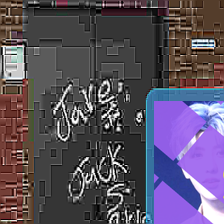

(-1, 0.9836514361743998, 0.7457603499192865, 0.5886646037994625, 0.5886646037994625)


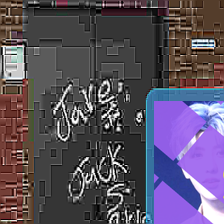

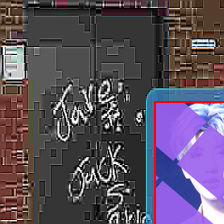

In [11]:
bg_aug_instance = generate_bg_aug()
auged_bg_img = bg_aug_instance(bg_img)
overlay_aug_instance = generate_overlay_aug()
auged_overlay_img = overlay_aug_instance(overlay)

overlaied_img, yolo_label = overlay_image(bg_img=auged_bg_img, overlay=auged_overlay_img)
display(overlaied_img)
print(yolo_label)

final_aug_instance = final_aug()
final_img = final_aug_instance(overlaied_img)
display(final_img)



yolo_rectangle = draw_yolo_rectangle(yolo_label=yolo_label, img = overlaied_img)
display(yolo_rectangle)